<a href="https://colab.research.google.com/github/sanjanabontha/SKMLI-175-TASKS/blob/main/Phase4(MiniProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

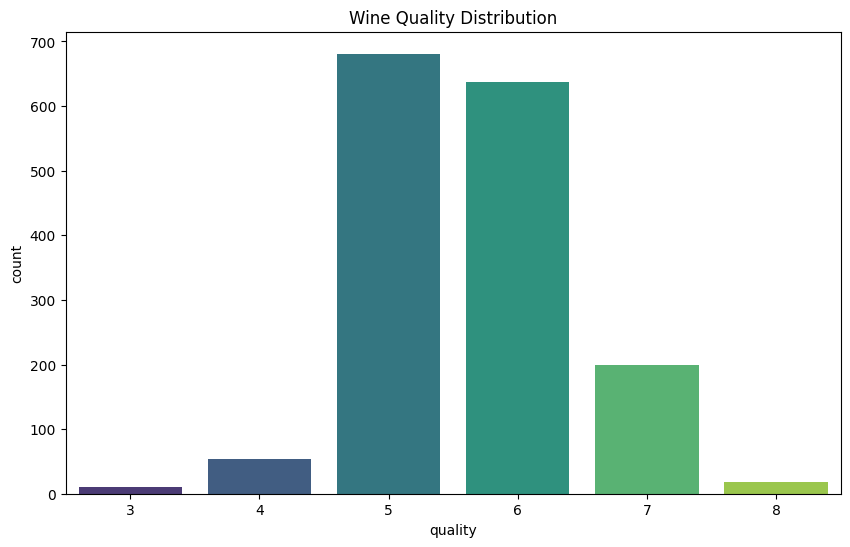

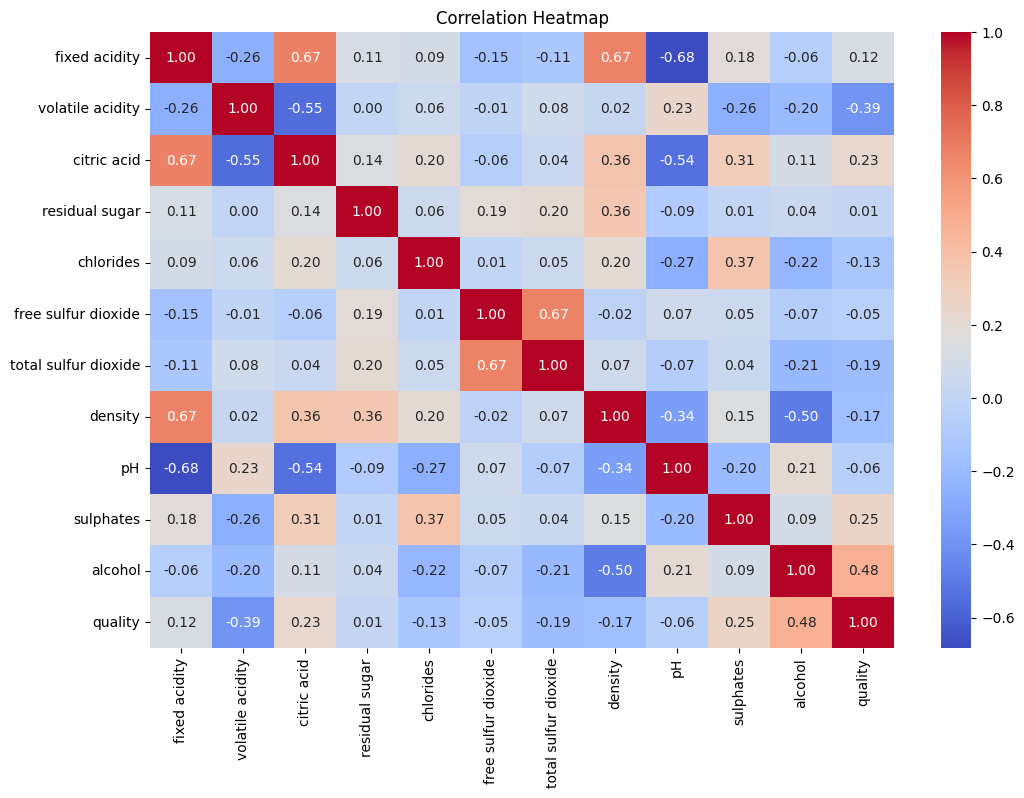

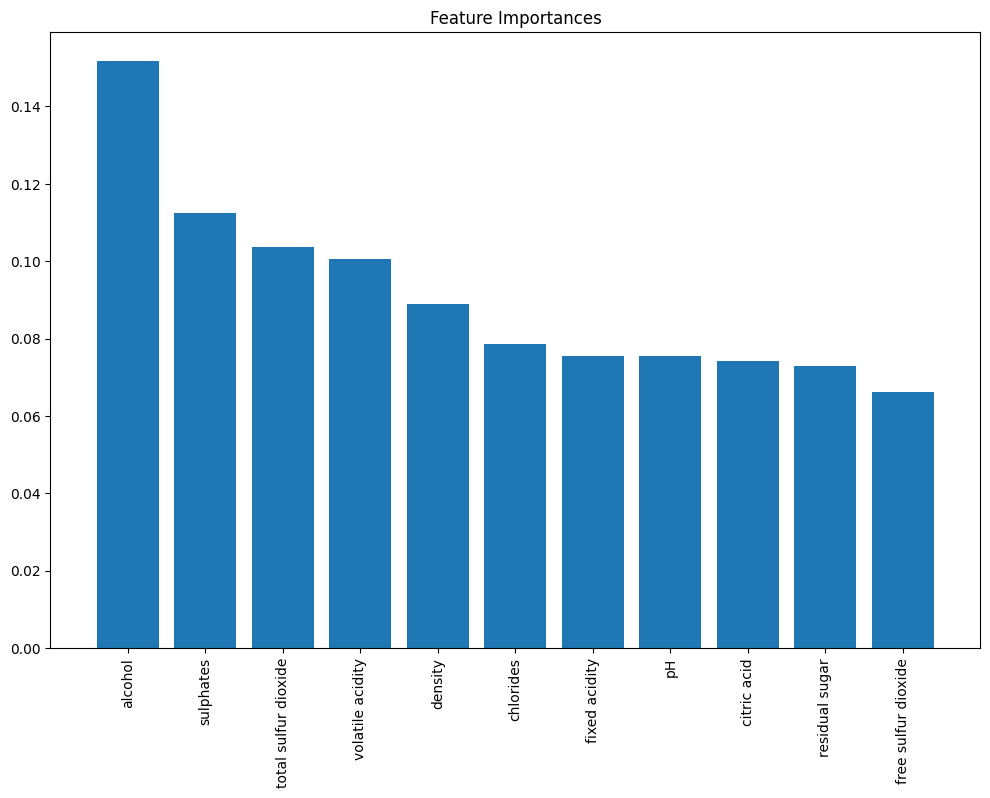



Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1 Score: 0.66

Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      1.00         5

    accuracy                           0.66       320
   macro avg       0.66      0.33      0.50       320
weighted avg       0.67      0.66      0.66       320



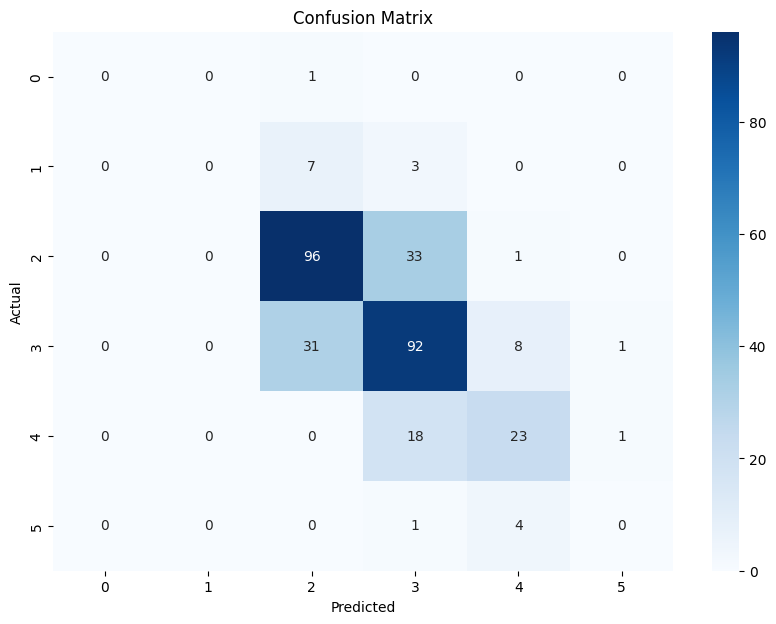


Linear Regression R^2 Score: 0.403180341279622
Linear Regression RMSE: 0.624519930798013

Ridge Regression R^2 Score: 0.4031606598177524
Ridge Regression RMSE: 0.6245302281832383

Lasso Regression R^2 Score: -0.005591701339940913
Lasso Regression RMSE: 0.81065409945582

ElasticNet Regression R^2 Score: -0.005591701339940913
ElasticNet Regression RMSE: 0.81065409945582

RandomForest Regression R^2 Score: 1.0
RandomForest Regression RMSE: 0.0




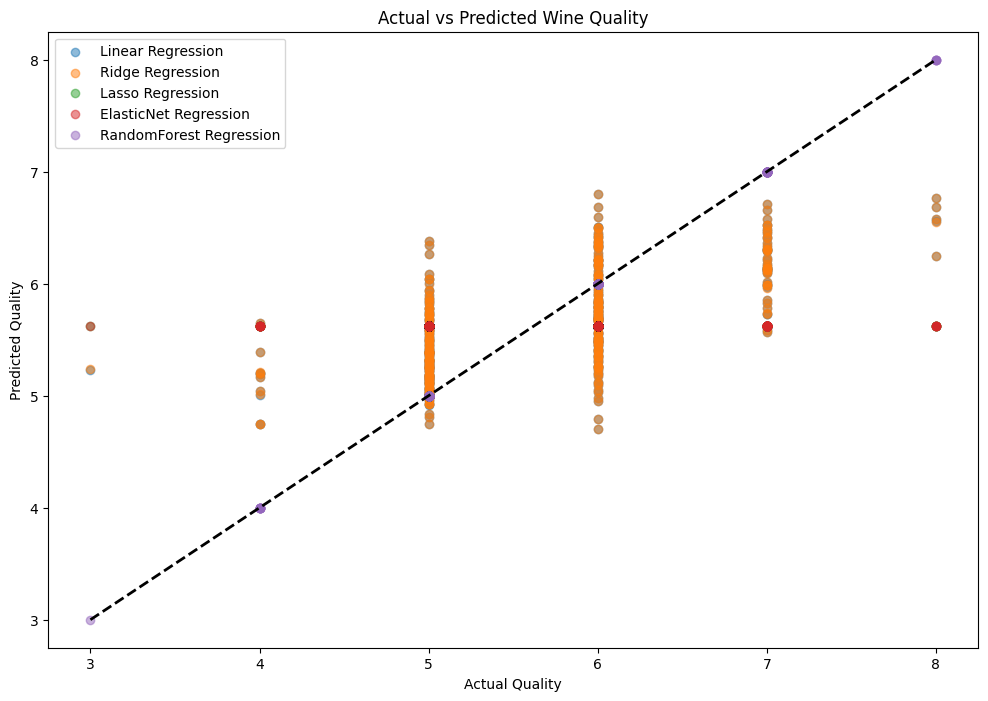

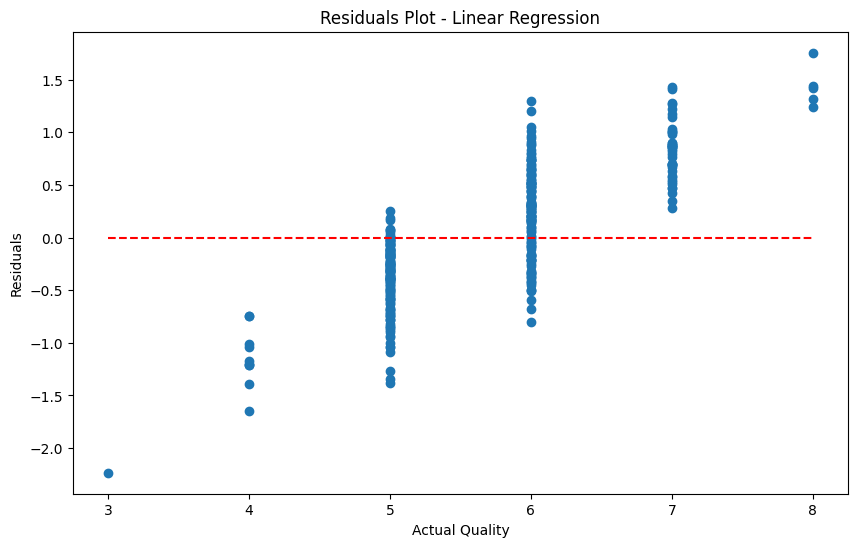

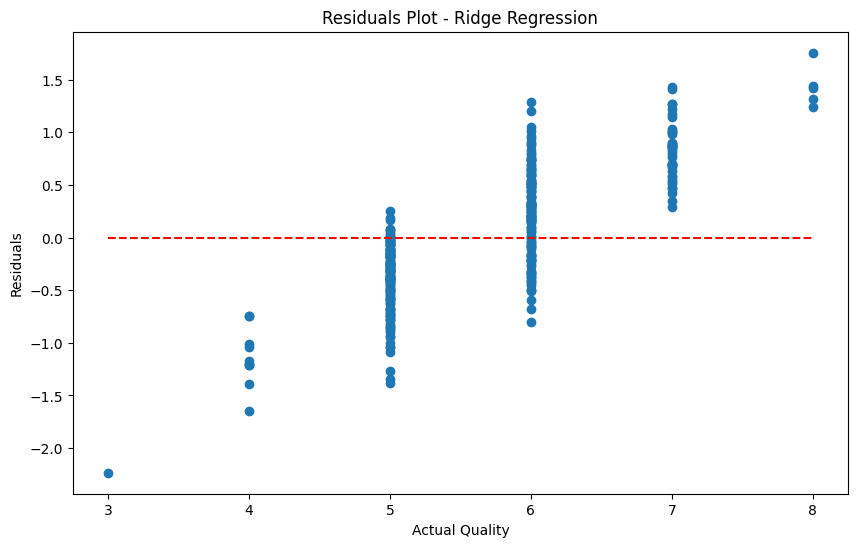

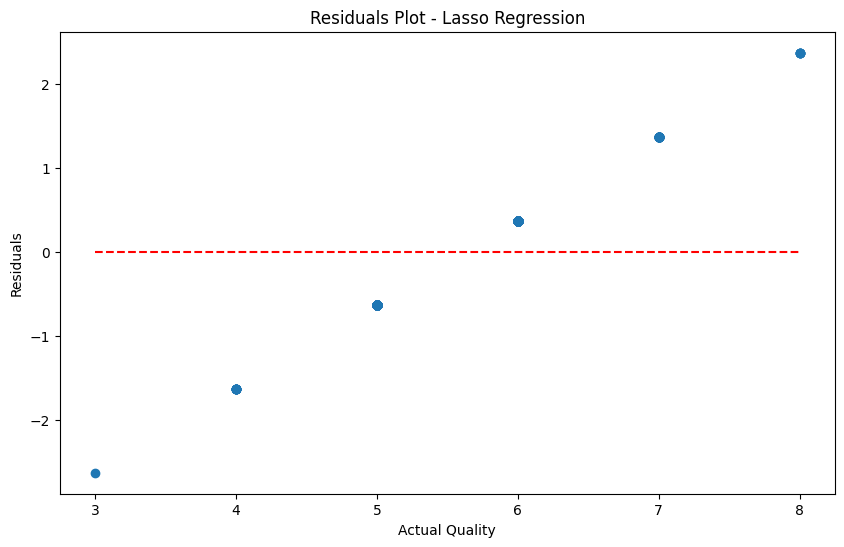

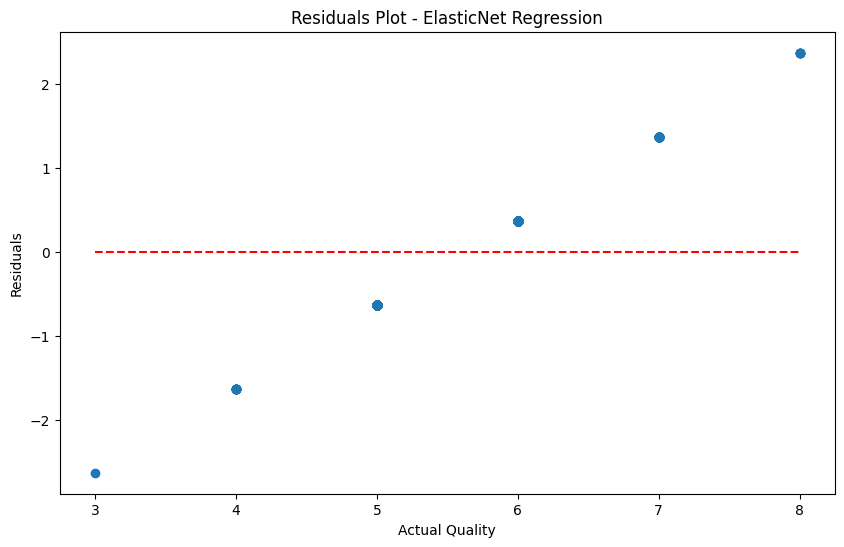

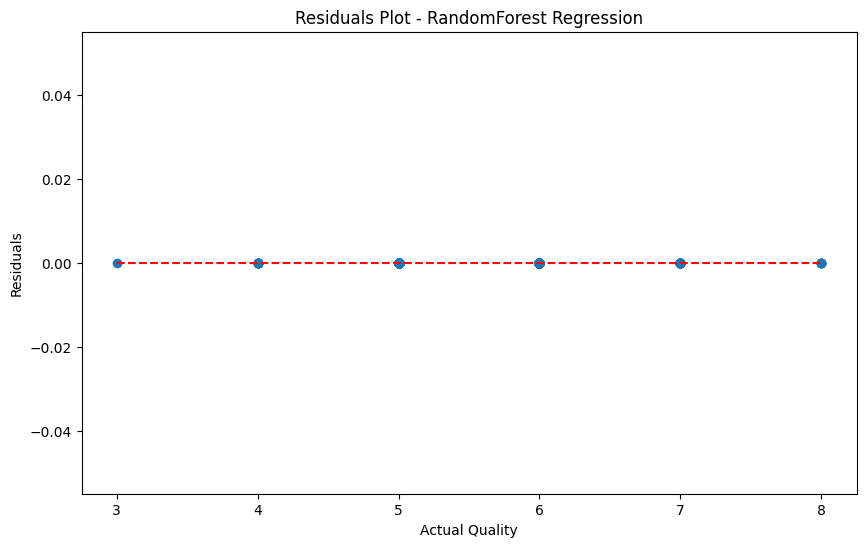




Best RandomForest Classification Accuracy: 0.659375
Best RandomForest Classification Precision: 0.6656065517604891
Best RandomForest Classification Recall: 0.659375
Best RandomForest Classification F1 Score: 0.6575835844295412


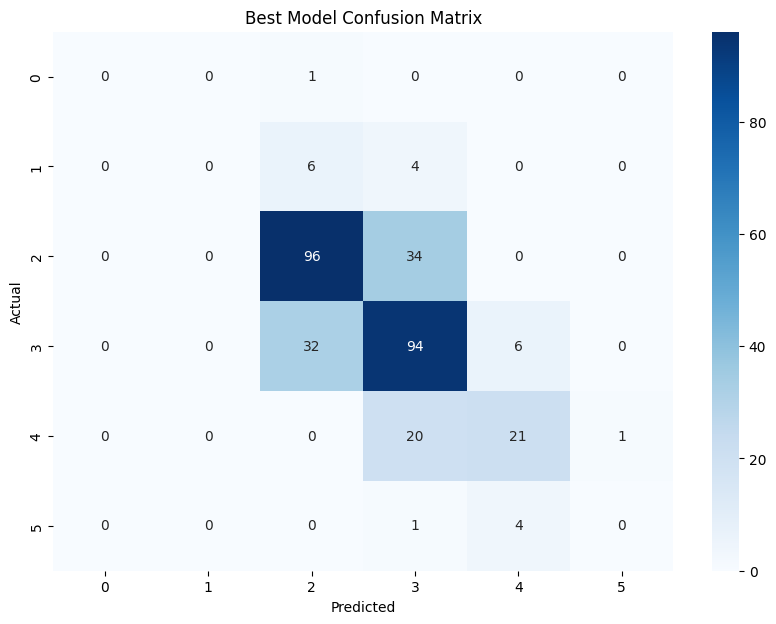


Predicted Quality for New Wine Sample: [5]
Example Prediction after loading the model: [5]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Data Collection
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Step 2: Data Preprocessing
# Handle missing values (none in the dataset, but for completeness)
data.ffill(inplace=True)

# Convert wine quality into categorical labels
data['quality'] = data['quality'].astype('category')

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, hue='quality', legend=False, palette='viridis')
plt.title('Wine Quality Distribution')
plt.show()
print("\n")

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
print("\n")

# Step 4: Feature Selection/Engineering
# Checking feature importance using RandomForest (an initial model to guide us)
rf_model = RandomForestClassifier(random_state=42)
X = data.drop('quality', axis=1)
y = data['quality']
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
print("\n")

# Step 5: Model Selection and Step 6: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit a pipeline for classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1, average='weighted')
recall = recall_score(y_test, y_pred, zero_division=1, average='weighted')
f1 = f1_score(y_test, y_pred, zero_division=1, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Linear Regression (converted to classification for this task)
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
print("\nLinear Regression R^2 Score:", r2_score(y_test, y_pred_linear))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

# Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
print("\nRidge Regression R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Lasso Regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
print("\nLasso Regression R^2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# ElasticNet Regression
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet())
])
elastic_pipeline.fit(X_train, y_train)
y_pred_elastic = elastic_pipeline.predict(X_test)
print("\nElasticNet Regression R^2 Score:", r2_score(y_test, y_pred_elastic))
print("ElasticNet Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))

# RandomForest Regression
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForest Regression R^2 Score:", r2_score(y_test, y_pred_rf))
print("RandomForest Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("\n")

# Step 7: Model Evaluation & Plotting
# Plot predictions vs actual for each model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.5)
plt.scatter(y_test, y_pred_elastic, label='ElasticNet Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='RandomForest Regression', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.legend()
plt.show()
print("\n")

# Residual Plots for all models
models = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'ElasticNet Regression': y_pred_elastic,
    'RandomForest Regression': y_pred_rf
}

for name, preds in models.items():
    plt.figure(figsize=(10, 6))
    # Convert y_test to numeric for the residual calculation
    plt.scatter(y_test.astype(float), y_test.astype(float) - preds)
    plt.hlines(0, min(y_test), max(y_test), colors='r', linestyles='dashed')
    plt.xlabel('Actual Quality')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {name}')
    plt.show()
    print("\n")

# Step 8: Hyperparameter Tuning (example with RandomForest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("\nBest RandomForest Classification Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best RandomForest Classification Precision:", precision_score(y_test, y_pred_best, zero_division=1,average='weighted'))
print("Best RandomForest Classification Recall:", recall_score(y_test, y_pred_best, zero_division=1, average='weighted'))
print("Best RandomForest Classification F1 Score:", f1_score(y_test, y_pred_best, zero_division=1, average='weighted'))

# Confusion Matrix for best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 9: Prediction
new_wine = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.7],
    'citric acid': [0.0],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11.0],
    'total sulfur dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4]
})

predicted_quality = best_model.predict(new_wine)
print('\nPredicted Quality for New Wine Sample:', predicted_quality)

# Step 10: Deployment
joblib.dump(best_model, 'wine_quality_predictor.pkl')

# Example of loading the model and making predictions
loaded_model = joblib.load('wine_quality_predictor.pkl')
example_prediction = loaded_model.predict(new_wine)
print('Example Prediction after loading the model:', example_prediction)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

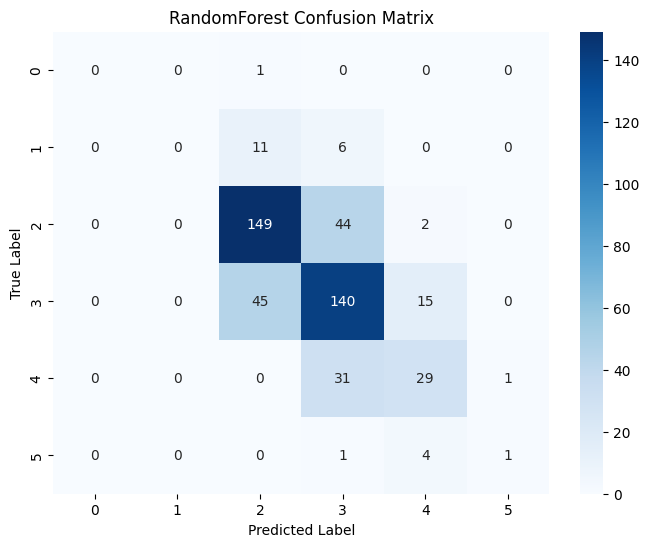


SVM Model:
Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        17
           5       0.64      0.78      0.71       195
           6       0.57      0.60      0.59       200
           7       0.59      0.28      0.38        61
           8       1.00      0.00      0.00         6

    accuracy                           0.61       480
   macro avg       0.80      0.28      0.28       480
weighted avg       0.62      0.61      0.58       480



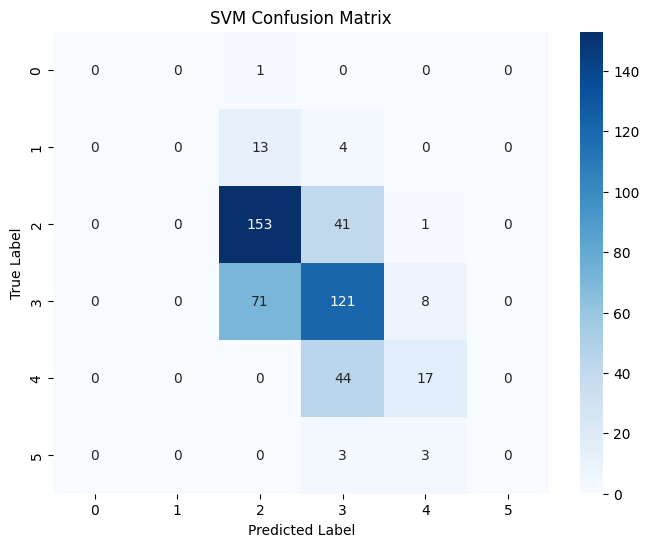


LogisticRegression Model:
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.42      0.26      0.32        61
           8       1.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.76      0.26      0.26       480
weighted avg       0.58      0.56      0.54       480



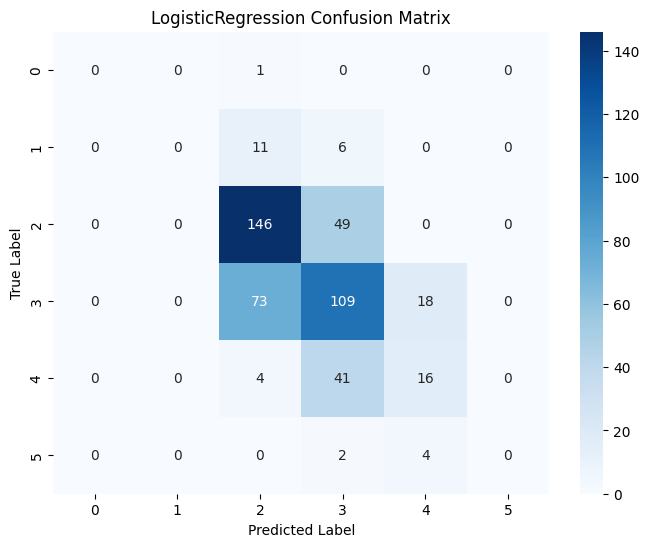

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')

# Display first few rows of the dataframe
print(data.head())

# Define features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'\n{name} Model:')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
